<a href="https://colab.research.google.com/github/mabdulghofur142/Mid-Project-AMS/blob/main/Code/Capstone_Project_01_(AMS_MID_Project)_Group_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Capstone Project 01 (AMS MID Project) - Group E***

| NIM | Nama |
| -------- | -------- |
|11220940000011	|Ulfatul Adawiyah|
|11220940000020  | Muhammad Abdul Ghofur |
|11220940000055	| Miranita Anisa Rohmah|
|11220940000056 |	Syafiqah Marsya Kholiyadi|




**TOPIK**

Analisis Sentimen dan Persepsi Publik terhadap Pemotongan Anggaran Inpres 1/2025 di Media Sosial

## Latar Belakang

Instruksi presiden no 1 tahun 2025 tentang efisiensi anggaran belanja bulanan negara dan daerah menuai berbagai reaksi masyarakat Indonesia.
Sehingga analisis sentimen di media sosial yang merupakan wadah utama bagi masyarakat menyuarakan pendapat, kritik, maupun dukungan terhadap kebijakan ini penting dilakukan untuk melihat respons masyarakat secara real-time dan memberikan gambaran terhadap penerimaan kebijakan di lapangan.

## Rumusan Masalah

**Permasalahan**
1. Apa isu-isu utama terkait dengan Inpres 1/2025?
2. Bagaimana sentimen publik terhadap kebijakan efisisensi anggaran?
3. Bagaimana respon publik terhadap berbagai isu efisiensi anggaran?
4. Apa ekspektasi publik tekait kebijakan efisiensi anggaran?

**Periode Pengumpulan Data**

JANUARI - MARET 2025

**Sumber Data**

YOUTUBE

**Kata Kunci**
* Efisiensi Anggaran
* Pangkas Anggaran
* Pemotongan Dana

## Packages

In [1]:
!pip install Sastrawi
!pip install unidecode
!pip install textblob
!python -m textblob.download_corpora
!pip install wordcloud matplotlib
!pip install squarify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.2 MB/s eta 0:00:00
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [2]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from html import unescape
import pandas as pd
from unidecode import unidecode # Import the unidecode function
from textblob import TextBlob # Import the TextBlob class
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import requests
import json
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from wordcloud import WordCloud
import re, operator, numpy as np
from tqdm import tqdm
from collections import Counter
import squarify


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Mempersiapkan Data

## Pengambilan Data

Data diambil dan dikumpulkan dari YouTube. Untuk collab pengambilan data bisa diakses melalui link berikut: [Colab_Ambil_Data_Youtube](https://colab.research.google.com/github/mabdulghofur142/Mid-Project-AMS/blob/main/Code/Get_Data_Youtube_No_Duplicates.ipynb)


## Import Data

Sebelumnya pada link berikut
- [Spreadsheet_Pelabelan](https://docs.google.com/spreadsheets/d/1cKJDLW5fKgdXgirApA-4_RgVmsh2OrL4rI_DbosuYys/edit?usp=sharing)

Kami telah melakukan proses pelabelan sentimen (3:Positif, 1:Negatif, dan 2:Netral) pada setiap komentar sebelum data ini diunggah ke GitHub dan diimpor ke sini. Langkah ini dilakukan untuk mendukung analisis sentimen publik terkait topik kami.

In [3]:
import pandas as pd

# Gunakan wget untuk mendownload file
!wget "https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/main/Data/YOUTUBE%20EFISIENSI%20SENTIMENT.xlsx" -O "YOUTUBE_EFISIENSI_SENTIMENT.xlsx"

# Lalu baca sheetnya
df_video = pd.read_excel("YOUTUBE_EFISIENSI_SENTIMENT.xlsx", sheet_name="VideoInfo")
df_top = pd.read_excel("YOUTUBE_EFISIENSI_SENTIMENT.xlsx", sheet_name="TopComments")

# print(df_video.head())
# print(df_top.head())


--2025-06-05 15:33:44--  https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/main/Data/YOUTUBE%20EFISIENSI%20SENTIMENT.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1112787 (1.1M) [application/octet-stream]
Saving to: ‘YOUTUBE_EFISIENSI_SENTIMENT.xlsx’

YOUTUBE_EFISIENSI_S 100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-06-05 15:33:44 (18.6 MB/s) - ‘YOUTUBE_EFISIENSI_SENTIMENT.xlsx’ saved [1112787/1112787]



In [4]:
df_video

,video_id,title,description,uploader,upload_date,view_count,like_count,comment_count
0,GX-aKctcuX4,Pemerintah Resmi Potong Dana Transfer ke Daera...,Menteri Keuangan Sri Mulyani Indrawati resmi m...,CNBC Indonesia,2025-02-04T14:00:16Z,76649,601,736
1,41RGl7dq8YQ,[FULL] Penjelasan Wamen Diktisaintek Soal Efis...,KOMPAS.TV - Demonstrasi mahasiswa serempak dig...,KOMPASTV,2025-02-18T18:01:01Z,108928,842,749
2,YD3HC6Qaa3o,Menyoroti Kebijakan Pemotongan Anggaran Pemeri...,"Pemotongan anggaran sebesar Rp306,7 triliun at...",CNN Indonesia,2025-02-01T16:30:14Z,48159,217,121
3,dPkXZ3Daxh0,Kongkalikong DPR-Pemerintah Memotong Anggaran ...,Laporan jurnalistik berkualitas dan enak dibac...,Tempodotco,2025-02-08T04:00:06Z,1621804,18947,3985
4,E2gCGe1SzIs,"Anggaran Dipangkas, Operasional Kementerian/Le...",Pemerintah melakukan pemotongan besar besaran ...,CNN Indonesia,2025-02-05T13:00:24Z,66476,364,500
5,HBqmJdX0yEc,"Prabowo Pangkas Anggaran Hingga Rp 306 T, Buat...",Efisiensi anggaran yang dilakukan oleh pemerin...,CNN Indonesia,2025-01-28T13:10:58Z,48387,251,102
6,GpgqauHLi1E,"Efisiensi Anggaran, Menhan Rekrut Stafsus Baru...","JAKARTA, KOMPAS.TV – Pada 11 Februari 2025, Me...",KOMPASTV,2025-02-12T14:54:35Z,107250,512,898
7,xxAj_sC2fNI,[FULL] Kulik Maksud Prabowo Ada 'Raja Kecil' L...,"JAKARTA, KOMPAS.TV - Demi efisiensi anggaran, ...",KOMPASTV,2025-02-11T14:17:32Z,108583,492,324
8,1ySbwgZoUZI,"15 Proyek Raksasa Prabowo, Efisiensi Anggaran ...","MetroTV, \nMenteri pekerjaan umum dody hanggod...",METRO TV,2025-02-16T05:46:00Z,502561,3310,1524


In [5]:
# Jumlah Tweet
print(f"Jumlah Komentar yang kami peroleh: {df_top.shape[0]} komentar dari {df_video.shape[0]} video")

Jumlah Komentar yang kami peroleh: 6157 komentar dari 9 video


In [6]:
df_top.columns

Index(['a', 'video_id', 'author', 'likes', 'published', 'updated', 'text',
       'teks_new', 'teks_new_lower',
       'sentimen (1 negatif, 2 netral, 3 positif)'],
      dtype='object')

## Normalisasi data teks

In [7]:
# Menghapus kolom yang tidak digunakan
df_top.drop(columns=['a', 'published','teks_new_lower'],inplace=True)

In [8]:
df_top.rename(columns={'sentimen (1 negatif, 2 netral, 3 positif)': 'label sentiment'}, inplace=True)

In [9]:
print(df_top['label sentiment'].unique())
print(df_top['label sentiment'].dtype)


[ 1  2  3 22]
int64


In [10]:
# Tampilkan baris dengan nilai label sentiment yang tidak termasuk 1, 2, atau 3
df_top_invalid = df_top[~df_top['label sentiment'].isin([1, 2, 3])]
print(df_top_invalid)


         video_id                author  likes               updated  \
3902  dPkXZ3Daxh0  @SriKuswiyanti-ij7rf     61  2025-02-08T03:55:59Z   

                  text          teks_new  label sentiment  
3902  bravo bocor alus  bravo bocor alus               22  


In [11]:
df_top.at[3902, 'label sentiment'] = 2


In [12]:
# Mapping nilai angka ke label kategori
label_mapping = {
    1: 'negatif',
    2: 'netral',
    3: 'positif'
}
df_top['label sentiment'] = df_top['label sentiment'].map(label_mapping)


In [13]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         6157 non-null   object
 1   author           6157 non-null   object
 2   likes            6157 non-null   int64 
 3   updated          6157 non-null   object
 4   text             6156 non-null   object
 5   teks_new         6129 non-null   object
 6   label sentiment  6157 non-null   object
dtypes: int64(1), object(6)
memory usage: 336.8+ KB


In [14]:
df_top['updated'] = pd.to_datetime(df_top['updated'], errors='coerce')
df_top['label sentiment'] = df_top['label sentiment'].astype('category')

### Penanganan Slang/Singkatan


In [15]:
!mkdir -p data

# Download slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/slang.txt

# Download slangS_Final_Project_Group_H.json
!wget 'https://raw.githubusercontent.com/mabdulghofur142/Data-Mining/main/Final%20Project/slangS_Final_Project_Group_H.json' -O data/slangS_Final_Project_Group_H.json

# Download Slang_AMS.txt
!wget 'https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/refs/heads/main/Data/Slang_AMS.json' -O data/Slang_AMS.json


--2025-06-05 15:33:48--  https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) [text/plain]
Saving to: ‘data/slang.txt’

slang.txt           100%[===================>]  28.36K  --.-KB/s    in 0.002s  

2025-06-05 15:33:48 (13.4 MB/s) - ‘data/slang.txt’ saved [29041/29041]

--2025-06-05 15:33:48--  https://raw.githubusercontent.com/mabdulghofur142/Data-Mining/main/Final%20Project/slangS_Final_Project_Group_H.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [16]:
import json

# slang.txt
slang_dict1 = {}
with open('data/slang.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:
            slang_dict1[parts[0]] = " ".join(parts[1:])

# slangS_Final_Project_Group_H.json
with open('data/slangS_Final_Project_Group_H.json', 'r', encoding='utf-8') as f:
    slang_dict2 = json.load(f)

# Slang_AMS.txt
with open('data/Slang_AMS.json', 'r', encoding='utf-8') as f:
    slang_dict3 = json.load(f)

# Gabungkan semua
slang_dict = {}
slang_dict.update(slang_dict1)
slang_dict.update(slang_dict2)
slang_dict.update(slang_dict3)

# Tampilkan hasil
print(f"Total slang terms: {len(slang_dict)}")
print("Contoh slang:", list(slang_dict.items())[:10])


Total slang terms: 3735
Contoh slang: [('&', 'dan'), ('1pun', 'satupun'), ('7an', 'tujuan'), ('@', 'di'), ('Dr', 'dokter'), ('Jkt', 'Jakarta'), ('Jkw', 'jokowi'), ('Napza', 'narkoba psikotropika dan zat adiktif'), ('Nasihat', 'nasehat'), ('SE', 'Surat Edaran')]


In [ ]:
import re
import pandas as pd # Pastikan pandas diimpor jika belum

# Melakukan penanganan slang/singkatan
def replace_slang(text,dict_slang):
    # Pastikan input adalah string
    if not isinstance(text, str):
        return text # Atau kembalikan string kosong '' atau tangani sesuai kebutuhan

    # Mengganti frasa menggunakan regex
    for slang, pengganti in dict_slang.items():
        # Menambahkan penanganan error jika pengganti bukan string
        if not isinstance(pengganti, str):
            print(f"Warning: Pengganti untuk '{slang}' bukan string: {pengganti}. Melewatkan.")
            continue # Lewati slang ini jika penggantinya tidak valid

        text = re.sub(r'\b' + re.escape(slang) + r'\b', pengganti, text) # versi tanpa ignorecase, sensitif dengan huruf kapital atau kecil
    return text

# Pastikan kolom 'teks_new' bertipe string dan tangani nilai NaN sebelum menerapkan fungsi
# Anda bisa mengisi NaN dengan string kosong atau mengonversi seluruh kolom
df_top['teks_new'] = df_top['teks_new'].fillna('').astype(str)
# dikarenakan ada beberapa perbedaan format penulisan dalam dictionary slang kami maka dilakukan beberapa proses,
df_top['teks_slang1'] = df_top['teks_new'].apply(lambda x: replace_slang(x, slang_dict)) # replace singkatan nama yang sensitive case
# Pastikan juga kolom 'teks_slang1' bertipe string sebelum apply lower() dan fungsi replace_slang lagi
df_top['teks_slang1'] = df_top['teks_slang1'].fillna('').astype(str)
df_top['teks_slang2'] = df_top['teks_slang1'].apply(lambda x: replace_slang(x.lower(), slang_dict)) # replace singkatan dengan lower

In [ ]:
# Fungsi untuk menghapus angka di akhir kata
def remove_trailing_numbers(text):
    return re.sub(r'\d+\b', '', text)

df_top['teks_slang3'] = df_top['teks_slang2'].apply(lambda x: remove_trailing_numbers(x))

In [ ]:
# fungsi bersihkan simbol tak perlu
def remove_symbol(teks):
    docx = teks.strip()
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    return docx

df_top['teks_rapih'] = df_top['teks_slang3'].apply(lambda x: remove_symbol(x))

### Penanganan Stopword

In [17]:
!wget -P data/ https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/refs/heads/main/Data/stopword_AMS.txt

--2025-06-05 15:33:49--  https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/refs/heads/main/Data/stopword_AMS.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2887 (2.8K) [text/plain]
Saving to: ‘data/stopword_AMS.txt’

stopword_AMS.txt    100%[===================>]   2.82K  --.-KB/s    in 0s      

2025-06-05 15:33:49 (33.2 MB/s) - ‘data/stopword_AMS.txt’ saved [2887/2887]



In [ ]:
with open('data/stopword_AMS.txt', "r", encoding="utf-8", errors='replace') as file:
    id_stop = file.readlines()

id_stop = set([word.strip().lower() for word in id_stop])

In [ ]:
# Load stopword sastrawi
factory = StopWordRemoverFactory() # Create an instance of the StopWordRemoverFactory
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
# Load stopword dari nltk
# Mengambil stopwords dalam bahasa Inggris
stop_words = set(stopwords.words('english'))

# Mengambil stopwords dalam bahasa Indonesia
stop_words_id = set(stopwords.words('indonesian'))


print("Stopwords Bahasa Inggris:", stop_words)
print("Stopwords Bahasa Indonesia:", stop_words_id)


Stopwords Bahasa Inggris: {"it's", 'should', "should've", 't', 'do', 'further', 'shouldn', "isn't", "weren't", 'while', 'it', 'but', 'out', 'don', 'couldn', 'again', "that'll", 'those', 'than', 'most', 'yours', 'where', 'the', "couldn't", 'after', 'his', 'until', 'ours', "she's", "she'd", 'these', "they've", "didn't", 'our', "aren't", 'an', 'if', "don't", "it'd", 'only', 'same', 'll', "they'll", 'how', "it'll", "i'd", 'i', 'myself', 'above', 'shan', 'weren', "they're", 'that', 'now', 'any', 'doing', 'its', 'yourself', 'we', 'their', "i'm", 'needn', "we'd", 'himself', 'mustn', 'did', 'hasn', 'whom', 'with', 's', 'can', 'for', 'be', 'theirs', 'aren', 'them', 'have', 'against', 'wasn', 'am', 'when', 'during', 'her', 'some', 'has', 'once', 'by', 'both', 'down', "shouldn't", 'who', 'hadn', 'ma', "she'll", "he'll", 'very', "hadn't", 'ain', "he's", 'themselves', "we're", 'wouldn', 'you', 'been', 'this', 'd', 'under', "i've", 'off', 'other', 'all', "he'd", 'she', 'having', 'does', 'own', 'beca

In [ ]:
stop_new = {'siang','bergizi', 'owalah', 'iya'}

In [ ]:
stopwords = Sastrawi_StopWords_id | stop_words | stop_words_id | id_stop | stop_new# gabung semua stopwords
len(stopwords)

1225

In [ ]:
# fungsi bersihkan stopwords
def clean_text(text, stopwords):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Tokenisasi menggunakan TextBlob
    tokens = TextBlob(text).words

    # Menghapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    # Menggabungkan kembali token menjadi teks
    return ' '.join(filtered_tokens)

In [ ]:
df_top['clean_teks'] = df_top['teks_rapih'].apply(lambda x: clean_text(x, stopwords))
df_top.head()

,video_id,author,likes,updated,text,teks_new,label sentiment,teks_slang1,teks_slang2,teks_slang3,teks_rapih,clean_teks
0,GX-aKctcuX4,@deyufainchannel4127,0,2025-04-08 09:55:26+00:00,Prediksi saya....semua serba d efisiensi..yg k...,Prediksi saya....semua serba d efisiensi..yg k...,negatif,Prediksi saya....semua semua di efisiensi..yan...,prediksi saya....semua semua di efisiensi..yan...,prediksi saya....semua semua di efisiensi..yan...,prediksi saya semua semua di efisiensi yan...,prediksi efisiensi korupsi pusat mudah tertawa
1,GX-aKctcuX4,@AzwirAzo,0,2025-03-19 12:04:33+00:00,Pemangkasan anggaran daerah akan berpotensi pe...,Pemangkasan anggaran daerah akan berpotensi pe...,negatif,Pemangkasan anggaran daerah akan berpotensi pe...,pemangkasan anggaran daerah akan berpotensi pe...,pemangkasan anggaran daerah akan berpotensi pe...,pemangkasan anggaran daerah akan berpotensi pe...,pemangkasan anggaran daerah berpotensi penghas...
2,GX-aKctcuX4,@Sukakomenajalagi,0,2025-02-16 16:05:36+00:00,Mantap 😂😂😂😂😂,Mantap,netral,Mantap,mantap,mantap,mantap,mantap
3,GX-aKctcuX4,@Clupbrut,0,2025-02-15 12:00:56+00:00,Yang untuk kepentingan umum malah dipangkas ya...,Yang untuk kepentingan umum malah dipangkas ya...,negatif,Yang untuk kepentingan umum bahkan dipangkas y...,yang untuk kepentingan umum bahkan dipangkas y...,yang untuk kepentingan umum bahkan dipangkas y...,yang untuk kepentingan umum bahkan dipangkas y...,kepentingan dipangkas dipotong tunjangan dewan...
4,GX-aKctcuX4,@rakawindhu3690,0,2025-02-15 07:12:23+00:00,Tunjangan pejabat yg harus dipangkas,Tunjangan pejabat yg harus dipangkas,negatif,Tunjangan pejabat yang harus dipangkas,tunjangan pejabat yang harus dipangkas,tunjangan pejabat yang harus dipangkas,tunjangan pejabat yang harus dipangkas,tunjangan pejabat dipangkas


### Lematisasi

In [ ]:
# Membuat stemmer Sastrawi untuk proses Lemmatisasi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# fungsi untuk Lemmatisasi
def stem_text(text):
    # Melakukan Lemmatisasi  pada teks
    return stemmer.stem(text)

df_top['stem_teks'] = df_top['clean_teks'].apply(lambda x: stem_text(x))
df_top.head()

,video_id,author,likes,updated,text,teks_new,label sentiment,teks_slang1,teks_slang2,teks_slang3,teks_rapih,clean_teks,stem_teks
0,GX-aKctcuX4,@deyufainchannel4127,0,2025-04-08 09:55:26+00:00,Prediksi saya....semua serba d efisiensi..yg k...,Prediksi saya....semua serba d efisiensi..yg k...,negatif,Prediksi saya....semua semua di efisiensi..yan...,prediksi saya....semua semua di efisiensi..yan...,prediksi saya....semua semua di efisiensi..yan...,prediksi saya semua semua di efisiensi yan...,prediksi efisiensi korupsi pusat mudah tertawa,prediksi efisiensi korupsi pusat mudah tertawa
1,GX-aKctcuX4,@AzwirAzo,0,2025-03-19 12:04:33+00:00,Pemangkasan anggaran daerah akan berpotensi pe...,Pemangkasan anggaran daerah akan berpotensi pe...,negatif,Pemangkasan anggaran daerah akan berpotensi pe...,pemangkasan anggaran daerah akan berpotensi pe...,pemangkasan anggaran daerah akan berpotensi pe...,pemangkasan anggaran daerah akan berpotensi pe...,pemangkasan anggaran daerah berpotensi penghas...,mangkas anggar daerah potensi hasil pegawai ra...
2,GX-aKctcuX4,@Sukakomenajalagi,0,2025-02-16 16:05:36+00:00,Mantap 😂😂😂😂😂,Mantap,netral,Mantap,mantap,mantap,mantap,mantap,mantap
3,GX-aKctcuX4,@Clupbrut,0,2025-02-15 12:00:56+00:00,Yang untuk kepentingan umum malah dipangkas ya...,Yang untuk kepentingan umum malah dipangkas ya...,negatif,Yang untuk kepentingan umum bahkan dipangkas y...,yang untuk kepentingan umum bahkan dipangkas y...,yang untuk kepentingan umum bahkan dipangkas y...,yang untuk kepentingan umum bahkan dipangkas y...,kepentingan dipangkas dipotong tunjangan dewan...,penting pangkas potong tunjang dewan wakil rakyat
4,GX-aKctcuX4,@rakawindhu3690,0,2025-02-15 07:12:23+00:00,Tunjangan pejabat yg harus dipangkas,Tunjangan pejabat yg harus dipangkas,negatif,Tunjangan pejabat yang harus dipangkas,tunjangan pejabat yang harus dipangkas,tunjangan pejabat yang harus dipangkas,tunjangan pejabat yang harus dipangkas,tunjangan pejabat dipangkas,tunjang jabat pangkas


## Ekspor Data Clean

In [ ]:
# Ekspor hasil data bersih
df_top.to_csv('data/data_youtube_MID_AMS_final_all_fix.csv',index=False)

Data diekspor dan akan diunggah ke GitHub untuk memudahkan proses visualisasi, sehingga tidak perlu menjalankan ulang seluruh proses dari data mentah.

# Visualisasi dan Interpretasi


## Import Data Clean

In [19]:
# Import data yang telah di ekspor
import pandas as pd

file_ = 'data/'

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/main/Data/YOUTUBE%20EFISIENSI%20SENTIMENT.xlsx
!wget -P data/ https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/refs/heads/main/Data/data_youtube_MID_AMS_final_all_fix_cleaned.csv
# Membaca sheet bernama 'VideoInfo'
df_video_sen = pd.read_excel(f'{file_}YOUTUBE EFISIENSI SENTIMENT.xlsx', sheet_name='VideoInfo')

# Membaca sheet bernama 'TopComments'
df_top_sen = pd.read_csv(f'{file_}data_youtube_MID_AMS_final_all_fix_cleaned.csv')


print(df_top_sen.shape)
df_top_sen.sample(10)

mkdir: cannot create directory ‘data’: File exists
--2025-06-05 15:34:16--  https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/main/Data/YOUTUBE%20EFISIENSI%20SENTIMENT.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1112787 (1.1M) [application/octet-stream]
Saving to: ‘data/YOUTUBE EFISIENSI SENTIMENT.xlsx.1’

YOUTUBE EFISIENSI S 100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-06-05 15:34:16 (16.7 MB/s) - ‘data/YOUTUBE EFISIENSI SENTIMENT.xlsx.1’ saved [1112787/1112787]

--2025-06-05 15:34:16--  https://raw.githubusercontent.com/mabdulghofur142/Mid-Project-AMS/refs/heads/main/Data/data_youtube_MID_AMS_final_all_fix_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.10

,video_id,author,likes,updated,text,teks_new,label sentiment,teks_slang1,teks_slang2,teks_slang3,teks_rapih,clean_teks,stem_teks
4664,GpgqauHLi1E,@indrabudi124,0,2025-02-13 07:12:59+00:00,ya namanya membela ya pandai berargumentasi da...,ya namanya membela ya pandai berargumentasi da...,netral,iya namanya membela iya pandai berargumentasi ...,iya namanya membela iya pandai berargumentasi ...,iya namanya membela iya pandai berargumentasi ...,iya namanya membela iya pandai berargumentasi ...,namanya membela pandai berargumentasi pandai b...,nama bela pandai argumentasi pandai bicara pan...
531,41RGl7dq8YQ,@wurimarsigit3476,0,2025-02-25 00:11:34+00:00,"Ngecap aja nona ini, gk tau kenyataan. Tukin 4...","Ngecap aja nona ini, gak tau kenyataan. Tukin ...",negatif,"Ngecap saja nona ini, tidak tau kenyataan. Tuk...","ngecap saja nona ini, tidak tau kenyataan. tuk...","ngecap saja nona ini, tidak tau kenyataan. tuk...",ngecap saja nona ini tidak tau kenyataan tuk...,ngecap nona tau kenyataan tukin dibayar dana r...,ngecap nona tau nyata tukin bayar dana riset p...
4583,GpgqauHLi1E,@AgusSalim-cd9dp,0,2025-02-14 06:47:20+00:00,"Kabinet gemuk fokus balas budi endors lemak, k...","Kabinet gemuk fokus balas budi endors lemak, k...",negatif,"Kabinet gendut fokus balas budi endors lemak, ...","kabinet gendut fokus balas budi endors lemak, ...","kabinet gendut fokus balas budi endors lemak, ...",kabinet gendut fokus balas budi endors lemak ...,kabinet gendut fokus balas budi endors lemak b...,kabinet gendut fokus balas budi endors lemak b...
3565,dPkXZ3Daxh0,@Ex_Kapiten,0,2025-02-08 05:43:36+00:00,"Wah angran PU d potong 80%😅,,..siap"" rebutan p...","Wah angran PU d potong 80%,,..siap"" rebutan pr...",netral,"Wah angran PU di potong 80%,,..siap"" rebutan p...","wah angran pu di potong 80%,,..siap"" rebutan p...","wah angran pu di potong %,,..siap"" rebutan pro...",wah angran pu di potong siap rebutan pro...,angran pu potong rebutan proyek neh kontrktor,angran pu potong rebut proyek neh kontrktor
4002,E2gCGe1SzIs,@kucingganteng3536,0,2025-02-08 13:08:03+00:00,"Presenternya mantep, sangat mewakili pikiran","Presenternya mantep, sangat mewakili pikiran",netral,"Presenternya mantap, sangat mewakili pikiran","presenternya mantap, sangat mewakili pikiran","presenternya mantap, sangat mewakili pikiran",presenternya mantap sangat mewakili pikiran,presenternya mantap mewakili pikiran,presenternya mantap wakil pikir
148,GX-aKctcuX4,@BiangBocah,0,2025-02-07 01:00:14+00:00,Kasian pak prabowo pasti asn dan yg lainya gak...,Kasian pak prabowo pasti asn dan yg lainya gak...,netral,Kasian bapak prabowo pasti aparatur sipil nega...,kasihan bapak prabowo pasti aparatur sipil neg...,kasihan bapak prabowo pasti aparatur sipil neg...,kasihan bapak prabowo pasti aparatur sipil neg...,kasihan prabowo aparatur sipil negara lainya m...,kasihan prabowo aparatur sipil negara lai suka...
3722,dPkXZ3Daxh0,@mistisdanislami,0,2025-02-08 05:16:53+00:00,semoga lebih baik dan maju yang lebih mensejah...,semoga lebih baik dan maju yang lebih mensejah...,positif,semoga lebih baik dan maju yang lebih mensejah...,semoga lebih baik dan maju yang lebih mensejah...,semoga lebih baik dan maju yang lebih mensejah...,semoga lebih baik dan maju yang lebih mensejah...,semoga maju mensejahterakan rakyat,moga maju sejahtera rakyat
4141,E2gCGe1SzIs,@endangdangdang644,53,2025-02-05 21:45:17+00:00,Sadisss cuyyy...gegara anggaran dipangkas ..ri...,Sadisss cuyyy...gegara anggaran dipangkas ..ri...,negatif,Sadisss cuyyy...karena anggaran dipangkas ..ri...,sadisss cuyyy...karena anggaran dipangkas ..ri...,sadisss cuyyy...karena anggaran dipangkas ..ri...,sadisss cuyyy karena anggaran dipangkas ri...,sadisss cuyyy anggaran dipangkas ribuan aparat...,sadisss cuyyy anggar pangkas ribu aparatur sip...
293,GX-aKctcuX4,@rizalhakim1464,0,2025-02-05 15:01:12+00:00,Hentikan dana desa pa prabowo dan periksa kepa...,Hentikan dana desa pa prabowo dan periksa kepa...,positif,Hentikan dana desa bapak prabowo d

In [20]:
# Jumlah Tweet
print("Jumlah Tweet yang kami peroleh:", df_top_sen.shape[0]," Tweet")

Jumlah Tweet yang kami peroleh: 6157  Tweet


In [21]:
df_top_sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         6157 non-null   object
 1   author           6157 non-null   object
 2   likes            6157 non-null   int64 
 3   updated          6157 non-null   object
 4   text             6156 non-null   object
 5   teks_new         6129 non-null   object
 6   label sentiment  6157 non-null   object
 7   teks_slang1      6129 non-null   object
 8   teks_slang2      6129 non-null   object
 9   teks_slang3      6128 non-null   object
 10  teks_rapih       6128 non-null   object
 11  clean_teks       6086 non-null   object
 12  stem_teks        6086 non-null   object
dtypes: int64(1), object(12)
memory usage: 625.4+ KB


In [22]:
# Menghapus kolom yang tidak digunakan
df_final = df_top_sen.drop(columns=[ 'teks_new','teks_slang1', 'teks_slang2', 'teks_slang3',
       'teks_rapih', 'clean_teks'])

# Mengonversi kolom 'updated' ke format datetime, biarkan pandas infer formatnya (kemungkinan ISO 8601 setelah dibaca dari CSV)
# Jika inferensi otomatis tidak bekerja, coba format='ISO8601' atau format='mixed' dengan errors='coerce'
df_final['updated'] = pd.to_datetime(df_final['updated'])
# Atau coba ini jika format ISO 8601:
# df_final['updated'] = pd.to_datetime(df_final['updated'], format='ISO8601')
# Atau ini jika format campuran (kurang mungkin setelah save/load CSV):
# df_final['updated'] = pd.to_datetime(df_final['updated'], format='mixed', errors='coerce')

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   video_id         6157 non-null   object             
 1   author           6157 non-null   object             
 2   likes            6157 non-null   int64              
 3   updated          6157 non-null   datetime64[ns, UTC]
 4   text             6156 non-null   object             
 5   label sentiment  6157 non-null   object             
 6   stem_teks        6086 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 336.8+ KB


In [24]:
# Mengurutkan data berdasarkan Waktu
df_final = df_final.sort_values(by='updated')
df_final.reset_index(drop=True, inplace=True)

In [25]:
df_final

,video_id,author,likes,updated,text,label sentiment,stem_teks
0,HBqmJdX0yEc,@YasmonMaharaja,0,2025-01-28 13:41:15+00:00,"Mungkin untuk kemakmuran oligarki,",negatif,makmur oligarki
1,HBqmJdX0yEc,@SaipinIpin-b2s,7,2025-01-28 13:41:26+00:00,Janganrisaujanganwatirmarikitadukungkitadoakan...,positif,janganrisaujanganwatirmarikitadukungkitadoakan...
2,HBqmJdX0yEc,@KuyatYondog,0,2025-01-28 14:10:30+00:00,Guoblok semua..ya kalo namannya membangun itu ...,positif,goblok namannya bangun efisiensi
3,HBqmJdX0yEc,@hamamahaja8482,1,2025-01-28 14:48:53+00:00,Maunya SPPD jgn ada lg di seluruh Indonesia.ma...,netral,mau sppd indonesia mau daerah tgkt tgkt komisi...
4,HBqmJdX0yEc,@saijorahmat7307,1,2025-01-28 14:58:28+00:00,Semoga perekrutan ASN tetap dilakukan agar gen...,positif,moga rekrut aparatur sipil negara generasi mud...
...,...,...,...,...,...,...,...
6152,1ySbwgZoUZI,@NursalimKbm,0,2025-05-14 10:04:41+00:00,"Negara bangun ka kehen alesan,jawa selatan d l...",positif,negara bangun kakak kehen alesan jawa selatan ...
6153,dPkXZ3Daxh0,@nugrohocondrop8933,1,2025-05-16 16:42:46+00:00,10% itu partisipan yg mendukung kemungkaran ..,negatif,partisipan dukung mungkar
6154,dPkXZ3Daxh0,@MuhammadArsyad-f3b,1,2025-05-22 20:06:25+00:00,😮😮😮😮😮😮😮e😮😮 street 6,netral,e street
6155,dPkXZ3Daxh0,@jultenkaros4207,0,2025-05-27 03:35:12+00:00,Mr P 4 kali nyapres niat banget pengen jadi pr...,negatif,mr main kali nyapres niat banget presiden bing...


## Visualisasi (Analisis Komentar)

### Jumlah Komentar Harian

In [26]:
# Menyiapkan kolom untuk format tanggal harian
df_final['tanggal'] = df_final['updated'].dt.strftime('%d %b')
# Menghitung banyak tweet perhari
tweet_per_hari = df_final.groupby('tanggal').size()
# Convert the result into a DataFrame and rename the column
tweet_per_hari = tweet_per_hari.reset_index(name='size')

In [27]:
# Pastikan kolom 'updated' berformat datetime
df_final['updated'] = pd.to_datetime(df_final['updated'])

# Hitung jumlah komentar per tanggal komentar
daily_comments = df_final.groupby(df_final['updated'].dt.date).size().reset_index(name='jumlah_komentar')

# Ubah kembali kolom tanggal jadi datetime untuk plotting
daily_comments['updated'] = pd.to_datetime(daily_comments['updated'])

In [28]:
daily_comments

,updated,jumlah_komentar
0,2025-01-28,34
1,2025-01-29,15
2,2025-01-30,8
3,2025-01-31,6
4,2025-02-01,24
...,...,...
74,2025-05-05,1
75,2025-05-14,1
76,2025-05-16,1
77,2025-05-22,1


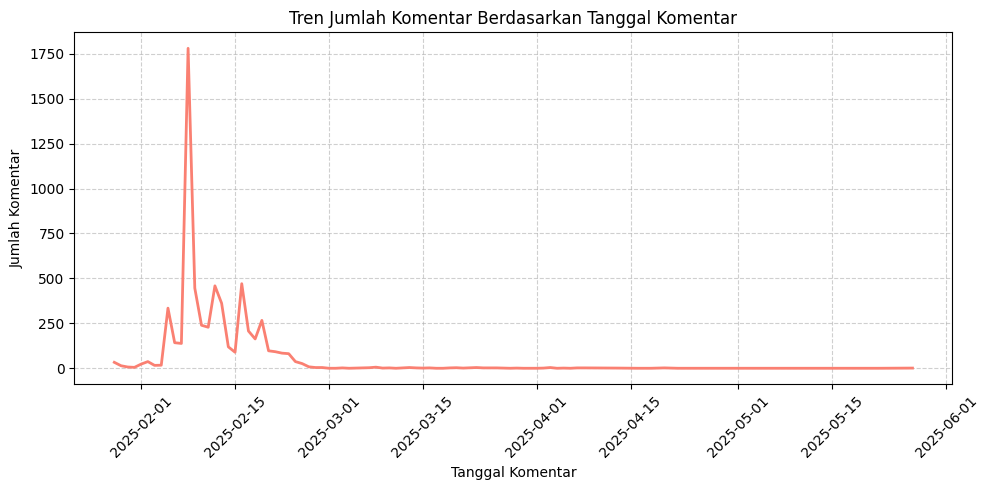

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom 'updated' berformat datetime
df_final['updated'] = pd.to_datetime(df_final['updated'])

# Hitung jumlah komentar per tanggal komentar
daily_comments = df_final.groupby(df_final['updated'].dt.date).size().reset_index(name='jumlah_komentar')

# Ubah kembali kolom tanggal jadi datetime untuk plotting
daily_comments['updated'] = pd.to_datetime(daily_comments['updated'])

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(daily_comments['updated'], daily_comments['jumlah_komentar'], color='salmon', linewidth=2)
plt.title('Tren Jumlah Komentar Berdasarkan Tanggal Komentar')
plt.xlabel('Tanggal Komentar')
plt.ylabel('Jumlah Komentar')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi, puncak tren komentar terkait isu kebijakan efisiensi anggaran terjadi pada awal hingga pertengahan Februari. Lonjakan ini sejalan dengan terbitnya Instruksi Presiden (Inpres) Nomor 1 Tahun 2025 yang diterbitkan pada 22 Januari 2025, yang memicu beragam reaksi dari publik. Namun, memasuki akhir Februari, intensitas komentar mulai menurun dan isu ini tidak lagi menjadi sorotan utama hingga bulan Juni saat ini.

## Visualisasi (Analisis Sentimen)

In [30]:
# Membuat dataframe baru tanpa duplikasi berdasarkan teks untuk analisis sentimen
# Agar tidak dipengaruhi oleh adanya spam ataupun buzzer
df2 = df_top_sen.drop_duplicates(subset=['teks_rapih'])
# Pastikan kolom 'stem_teks' bertipe string dan tangani nilai NaN sebelum menerapkan fungsi
df2['stem_teks'] = df2['stem_teks'].fillna('').astype(str)
df2.shape

<ipython-input-30-a3930466b976>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stem_teks'] = df2['stem_teks'].fillna('').astype(str)


(6081, 13)

In [31]:
# Mengolah kembali stopword, karena terdapat kata-kata baru yang mengganggu Word Cloud
# Hal ini di karenakan kata-kata tersebut muncul di semua kategori (di permasalahan sentimen)
# stopword khusus
stopword_nat = {'rakyat','negara','anggar','iya', 'perintah', 'potong','uang', 'indonesia','owalah','diksh','le', 'orang'}

In [32]:
# Fungsi Pembersih stopword
def clean_text(text, stopwords):
    # Mengubah teks menjadi huruf kecil (ini sudah dilakukan sebelumnya, tapi baiknya tetap ada di sini)
    text = str(text).lower() # Ensure text is a string and convert to lowercase

    # Tokenisasi menggunakan TextBlob
    tokens = TextBlob(text).words

    # Menghapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    # Menggabungkan kembali token menjadi teks
    return ' '.join(filtered_tokens)



# Membuat kolom baru tanpa stopword khusus
df2['stem_teksnew'] = df2['stem_teks'].apply(lambda x: clean_text(x, stopword_nat))

<ipython-input-32-994f49641935>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stem_teksnew'] = df2['stem_teks'].apply(lambda x: clean_text(x, stopword_nat))


### Top 10 "2 kata"

<ipython-input-33-03cc5b8c851c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(trigram_freqs), y=np.array(trigrams), palette='viridis')


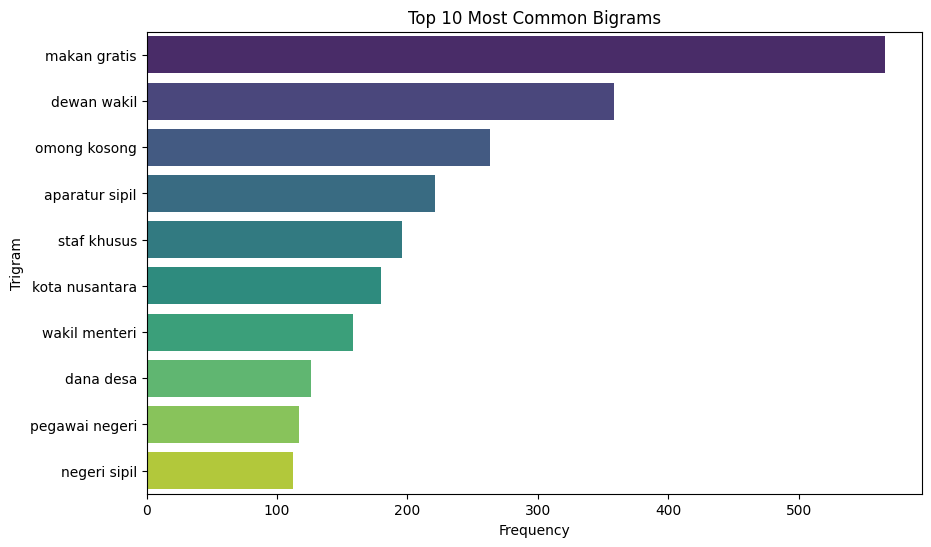

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat trigram
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df2['stem_teksnew'])

# Hitung frekuensi trigram
trigram_counts = X.sum(axis=0).A1
trigram_features = vectorizer.get_feature_names_out()

# Ambil 10 trigram paling sering
top_10_trigrams = sorted(zip(trigram_counts, trigram_features), reverse=True)[:10]
trigram_freqs, trigrams = zip(*top_10_trigrams)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=np.array(trigram_freqs), y=np.array(trigrams), palette='viridis')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()


**Top 10 Most Common Bigrams** merujuk pada pasangan dua kata yang sering muncul bersamaan. Bigrams ini memberikan wawasan yang berguna tentang kebijakan  pemotongan anggaran pada Instruksi Presiden (Inpres) Nomor 1 Tahun 2025, yang bisa menunjukkan perhatian utama masyarakat terhadap topik ini.



**Hasil**

1. **"makan gratis"** dan **"kota nusantara"** menyoroti isu dari anggaran yang dipotong akan digunakan untuk menjalankan program pemerintah yang lain, diantaranya makan gratis (mbg) dan ibu kota nusantara (ikn).
2. **"wakil menteri"** dan **"staff khusus"** menunjukkan pembahasan tentang bertambahnya junlah staf dan wakil pada kementerian di tengah kebijakan pemotongan anggaran ini.
3. **"aparatur sipil"**, **"pegawai negeri"**, dan **"negeri sipil"** menunjukkan adanya perhatian publik terhadap dampak kebijakan terhadap kinerja di sektor publik.
4. **"dana desa"** dan **"dewan wakil"** mengindikasikan adanya diskusi tentang dewan wakil (DPR, DPD) dan penggunaan dana desa.
5. **"omong kosong"** mengindikasikan adanya rasa tidak puas netizen terhadap kebijakan ini.

### Pie chart sentimen

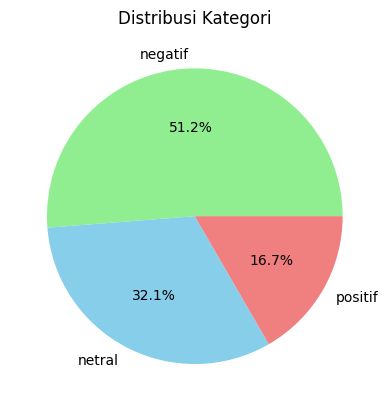

In [34]:
# Menghitung distribusi kategori
category_counts = df2['label sentiment'].value_counts()

# Membuat pie chart
category_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'skyblue', 'lightcoral'])

# Menambahkan judul
plt.title('Distribusi Kategori')

# Menampilkan chart
plt.ylabel('')  # Menghilangkan label y agar lebih rapi
plt.show()

1. Sentimen negatif
- sentimen negatif mendominasi pada pembahasan rencana pemerintah terkait efisiensi anggaran. Ini menunjukkan bahwa mayoritas publik tidak setuju atau memiliki persepsi buruk terhadap kebijakan efisiensi anggaran tersebut.
Penyebab persepsi buruk publik terkait isu efisien anggaran bisa berupa kekhawatiran bahwa kebijakan efisiensi akan berdampak pada layanan publik, ketidakpercayaan pada pelaksanaan, atau dampak sosial-ekonomi lainnya.
2. Sentimen Netral
- sentimen netral memiliki jumlah komentar yang signifikan, berada di tengah-tengah antara jumlah sentimen negatif dan sentimen positif. Ini menunjukkan adanya keraguan atau sikap menunggu dan melihat. Tidak menentang kebijakan yang ada tetapi juga tidak langsung setuju dan mempercayai sepenuhnya kebijkana tersebut.
3. sentimen Positif
- Hanya ada sekitar 16,7% publik yang menyatakan bahwa mereka mendukung pemerintah terkait efisisensi anggaran. Jumlah tersebut termasuk kecil jika dibandingkan dengan seluruh data yang di analisis. Itu artinya, hanya sebagian kecil masyarakaat yang melihat kebijakan efisiensi anggaran sebagai langkah yang baik atau efisien.


### Word Cloud

In [35]:
# Fungsi untuk memanggil baris yang mengandung beberapa keyword
def filter_teks_multi_kata(df2, kolom, kata_kunci):
    # Membuat filter untuk semua kata kunci
    mask = df2[kolom].str.contains(kata_kunci[0], case=False, na=False)
    for kata in kata_kunci[1:]:
        mask &= df2[kolom].str.contains(kata, case=False, na=False)
    return df2[mask]

#### WC dan Word link sentimen positif

In [36]:
dfpos = df2[df2['label sentiment']=='positif']

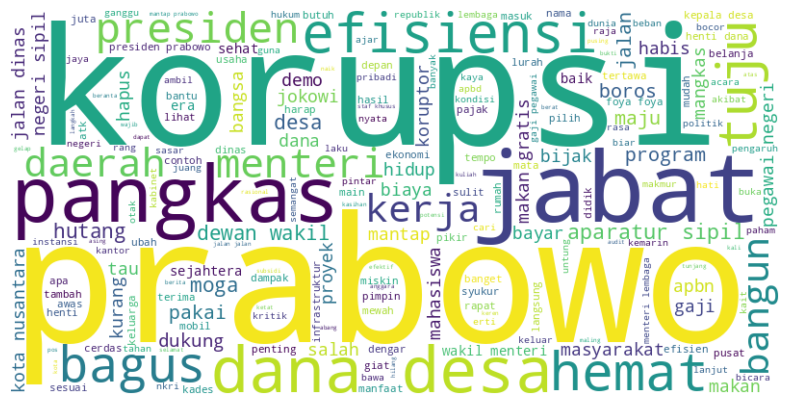

In [37]:
# Gabungkan kolom teks jika ada
text_pos = " ".join(dfpos['stem_teksnew'])

# Generate dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_pos)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

using [VoyanTools](https://voyant-tools.org)

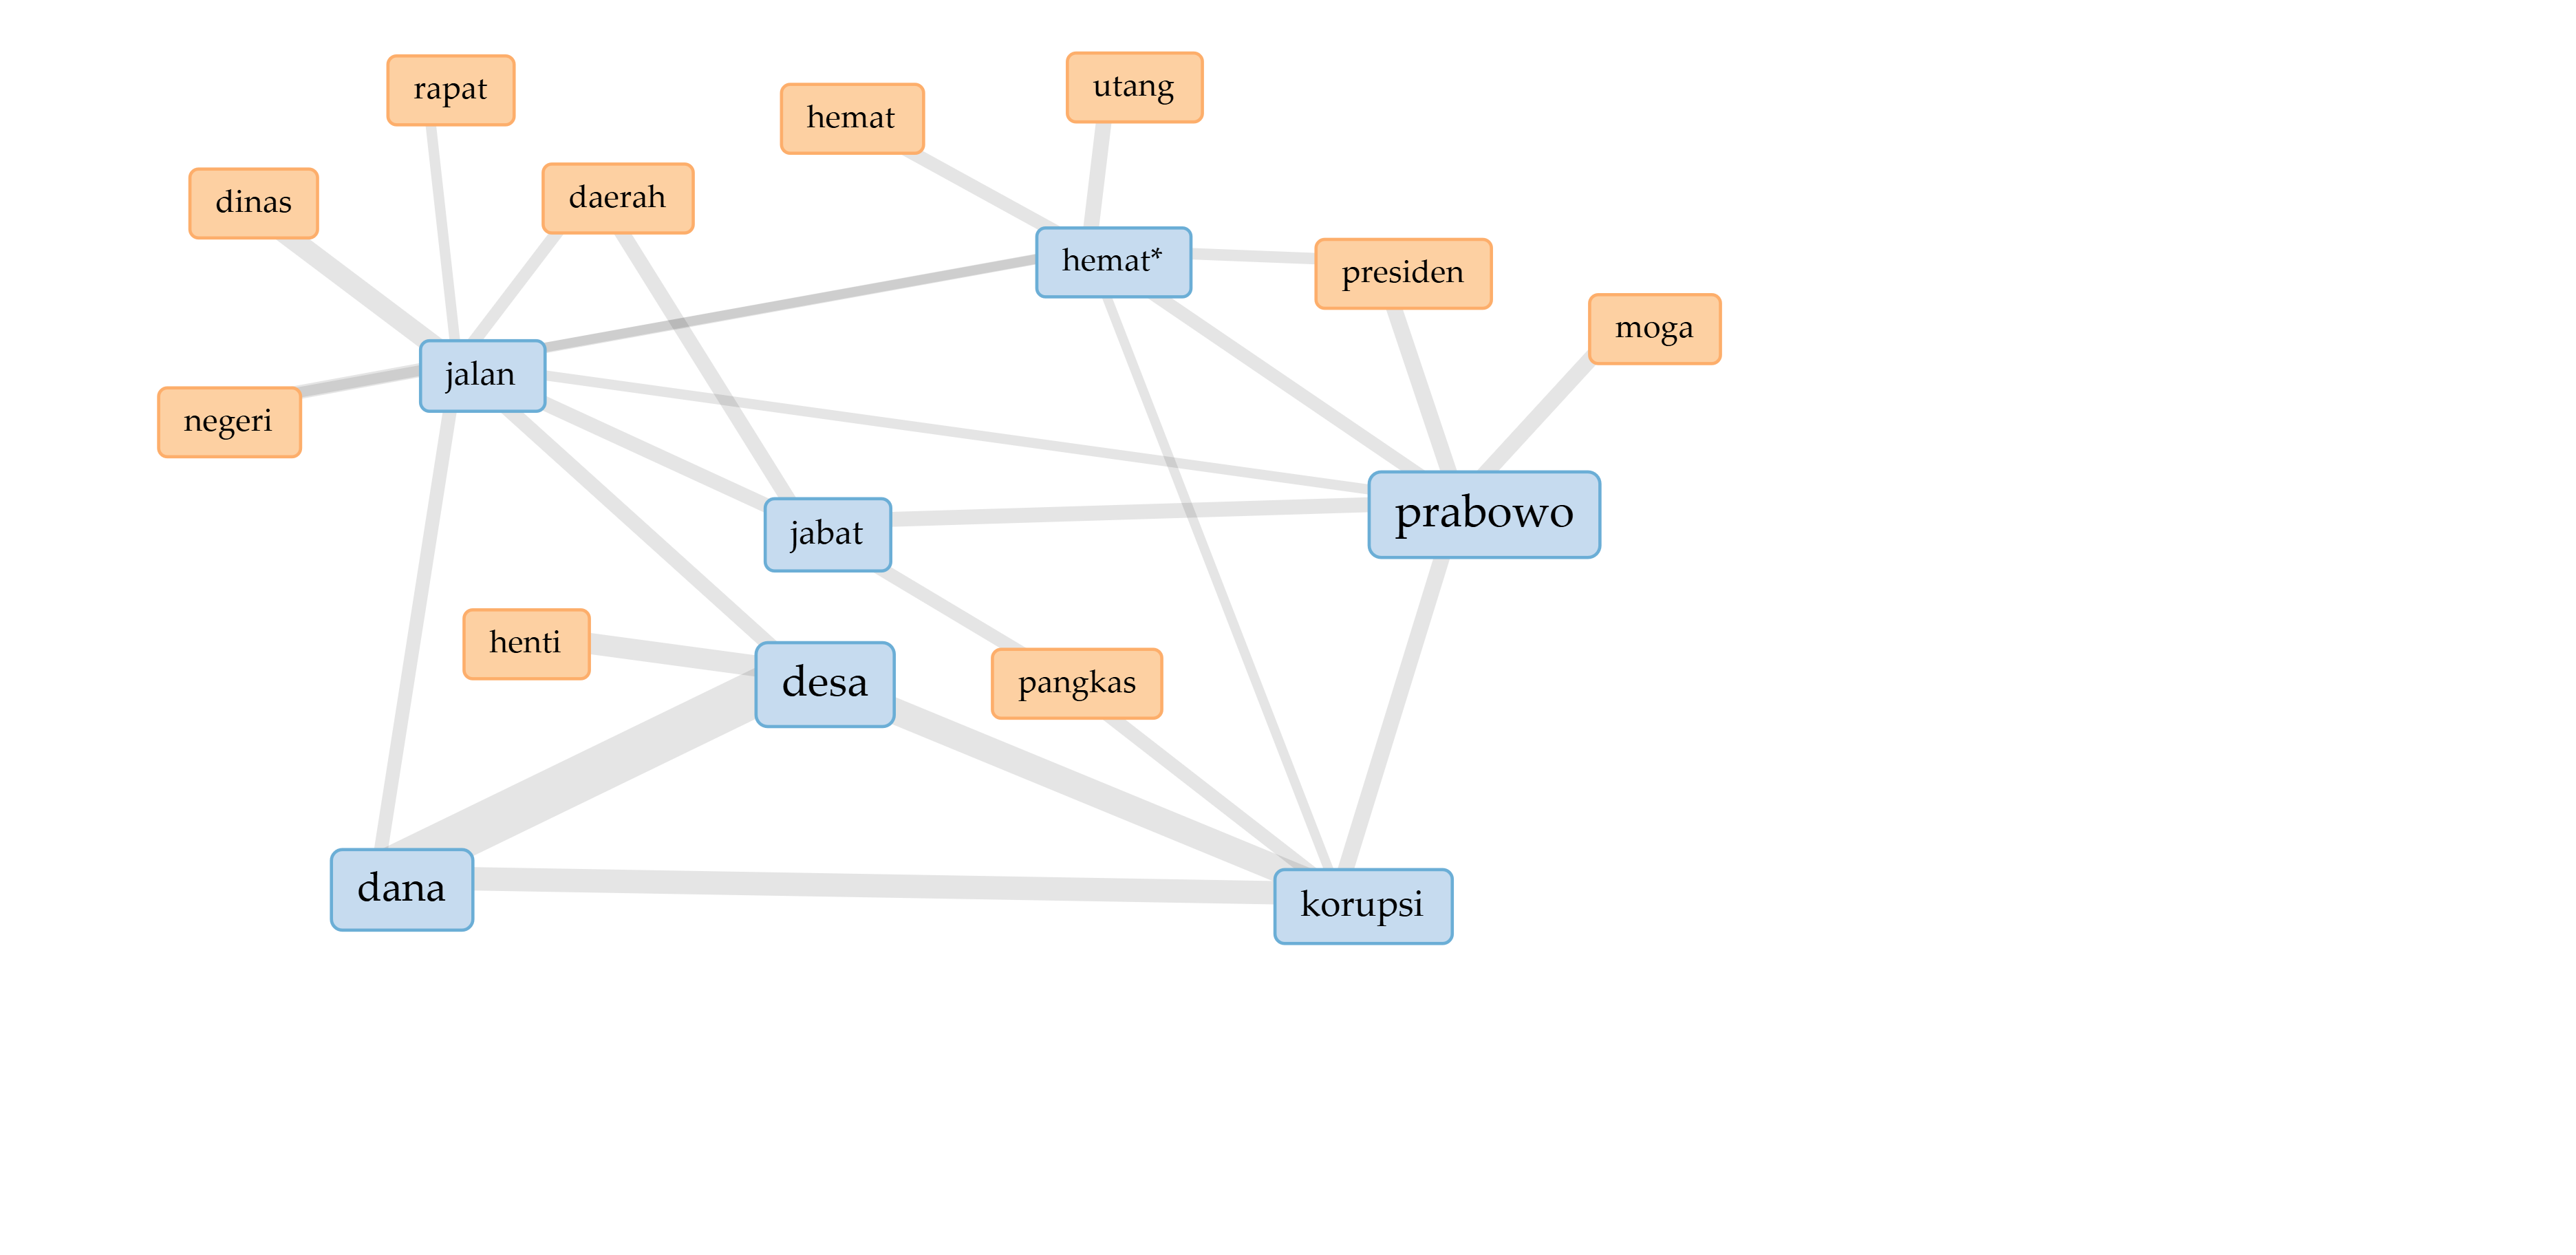

Interpretasi:

Beberapa kata yang paling digunakan adalah ‘prabowo’, ‘korupsi’, ‘dana desa’, ‘jabat’, ‘hemat’, dan sebagainya. Netizen berpendapat bahwa langkah prabowo pada kebijakan pemotongan anggaran termasuk terhadap dana desa layak dilakukan untuk mencegah korupsi yang sering terjadi di desa dan mengharapkan para pejabat bisa melakukan penghematan terhadap anggaran yang mereka gunakan, baik itu untuk perjalanan dinas, rapat, dsb.

In [38]:
# melihat isi tweet berdasarkan beberapa kata kunci yang besar
dfposwhat = filter_teks_multi_kata(dfpos, 'stem_teksnew', ['korupsi','dana desa'])
listpos = list(dfposwhat['text'])
listurlpos = list(dfposwhat['video_id'])
list_aur = list(dfposwhat['author'])
for i in range(5):
  print(f"{i+1}. Link [{'https://www.youtube.com/watch?v=' + listurlpos[i]}], {list_aur[i]}: {listpos[i]}")

1. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @najwaa285: Inspektorat didaerah gak kerja, seolah olah membiarkan korupsi jamaah dana desa...
2. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @vgs8868: AUDIT DANA DESA, DAN HENTIKAN ALIRANNYA. ITU CUMA SOGOKAN SI RAJA GORONG2 UNTUK APARAT DESA!!! SEMENTARA PENGGUNAAN DANA DESA BYK YG MENYIMPANG DAN DIKORUPSI!!! FAKTA!!!!
3. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @FarliAnsyah-n4r: Dana desa banyak dikorupsi
4. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @noorhadi6022: Dicek itu DANA DESA BUAT BANCAKAN KORUPSI
5. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @MardianaShofia: MAMPUSSS MABTAP PAK PRABOWO PRESIDEN SEUMUR HIDUP.. DAERAH2 KORUPSINYA PARAH APALAGI DANA DESA CUMA BUAT BAGUN RUMAH LURAH + JALAN2 SEWA LC


In [39]:
# melihat isi tweet  berdasarkan beberapa kata kunci yang besar
dfposwhat2 = filter_teks_multi_kata(dfpos, 'stem_teksnew', ['jabat','hemat'])
listpos2 = list(dfposwhat2['text'])
listurlpos2 = list(dfposwhat2['video_id'])
list_aur = list(dfposwhat2['author'])
for i in range(5):
  print(f"{i+1}. Link [{'https://www.youtube.com/watch?v=' + listurlpos2[i]}], {list_aur[i]}: {listpos2[i]}")

1. Link [https://www.youtube.com/watch?v=dPkXZ3Daxh0], @tvadekaka7559: Anggaran membludak klo hasil utang mah berefek negatif dalam jangka panjang....lebih baik menghemat.... seperti juga klo mengatasi ekonomi rumah tangga klo menghambur hamburkan uang juga akan morat marit.....harus ngerem lah pemakaian uang negara..... pejabat pejabat saat ini saya rasa hidup sudah mewah mewah
2. Link [https://www.youtube.com/watch?v=dPkXZ3Daxh0], @AryantoGapering: Penghematan bagus 
Supaya pejabat d daerah juga jangan  ke jawa terus untuk dinas taunya daerah sendiri tidak maju maju 
Dompet pejabat makin tebal rakyat makin merana
❤salut pak prabawo
3. Link [https://www.youtube.com/watch?v=dPkXZ3Daxh0], @fathurkurniansyah32: Di Negara Maju penghematan anggaran itu dimulai dari level atas dikalangan pejabatnya, kalau dikita bila perlu pejabat gak tersentuh tapi bawahan wajib dipress tanpa pertimbangan matang
4. Link [https://www.youtube.com/watch?v=dPkXZ3Daxh0], @ummuyusuf1429: Kebayang ada org banyak 

#### WC dan Word link Sentimen Negatif

In [40]:
dfneg = df2[df2['label sentiment']=='negatif']

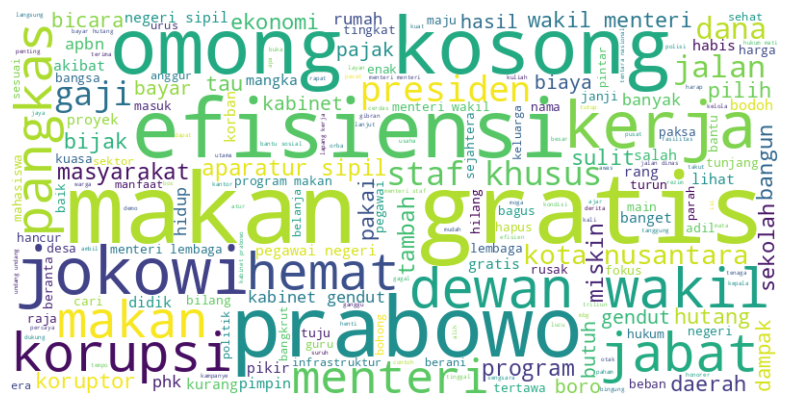

In [41]:
# Gabungkan kolom teks jika ada
text_neg = " ".join(dfneg['stem_teksnew'])

# Generate dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_neg)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

using [VoyanTools](https://voyant-tools.org)

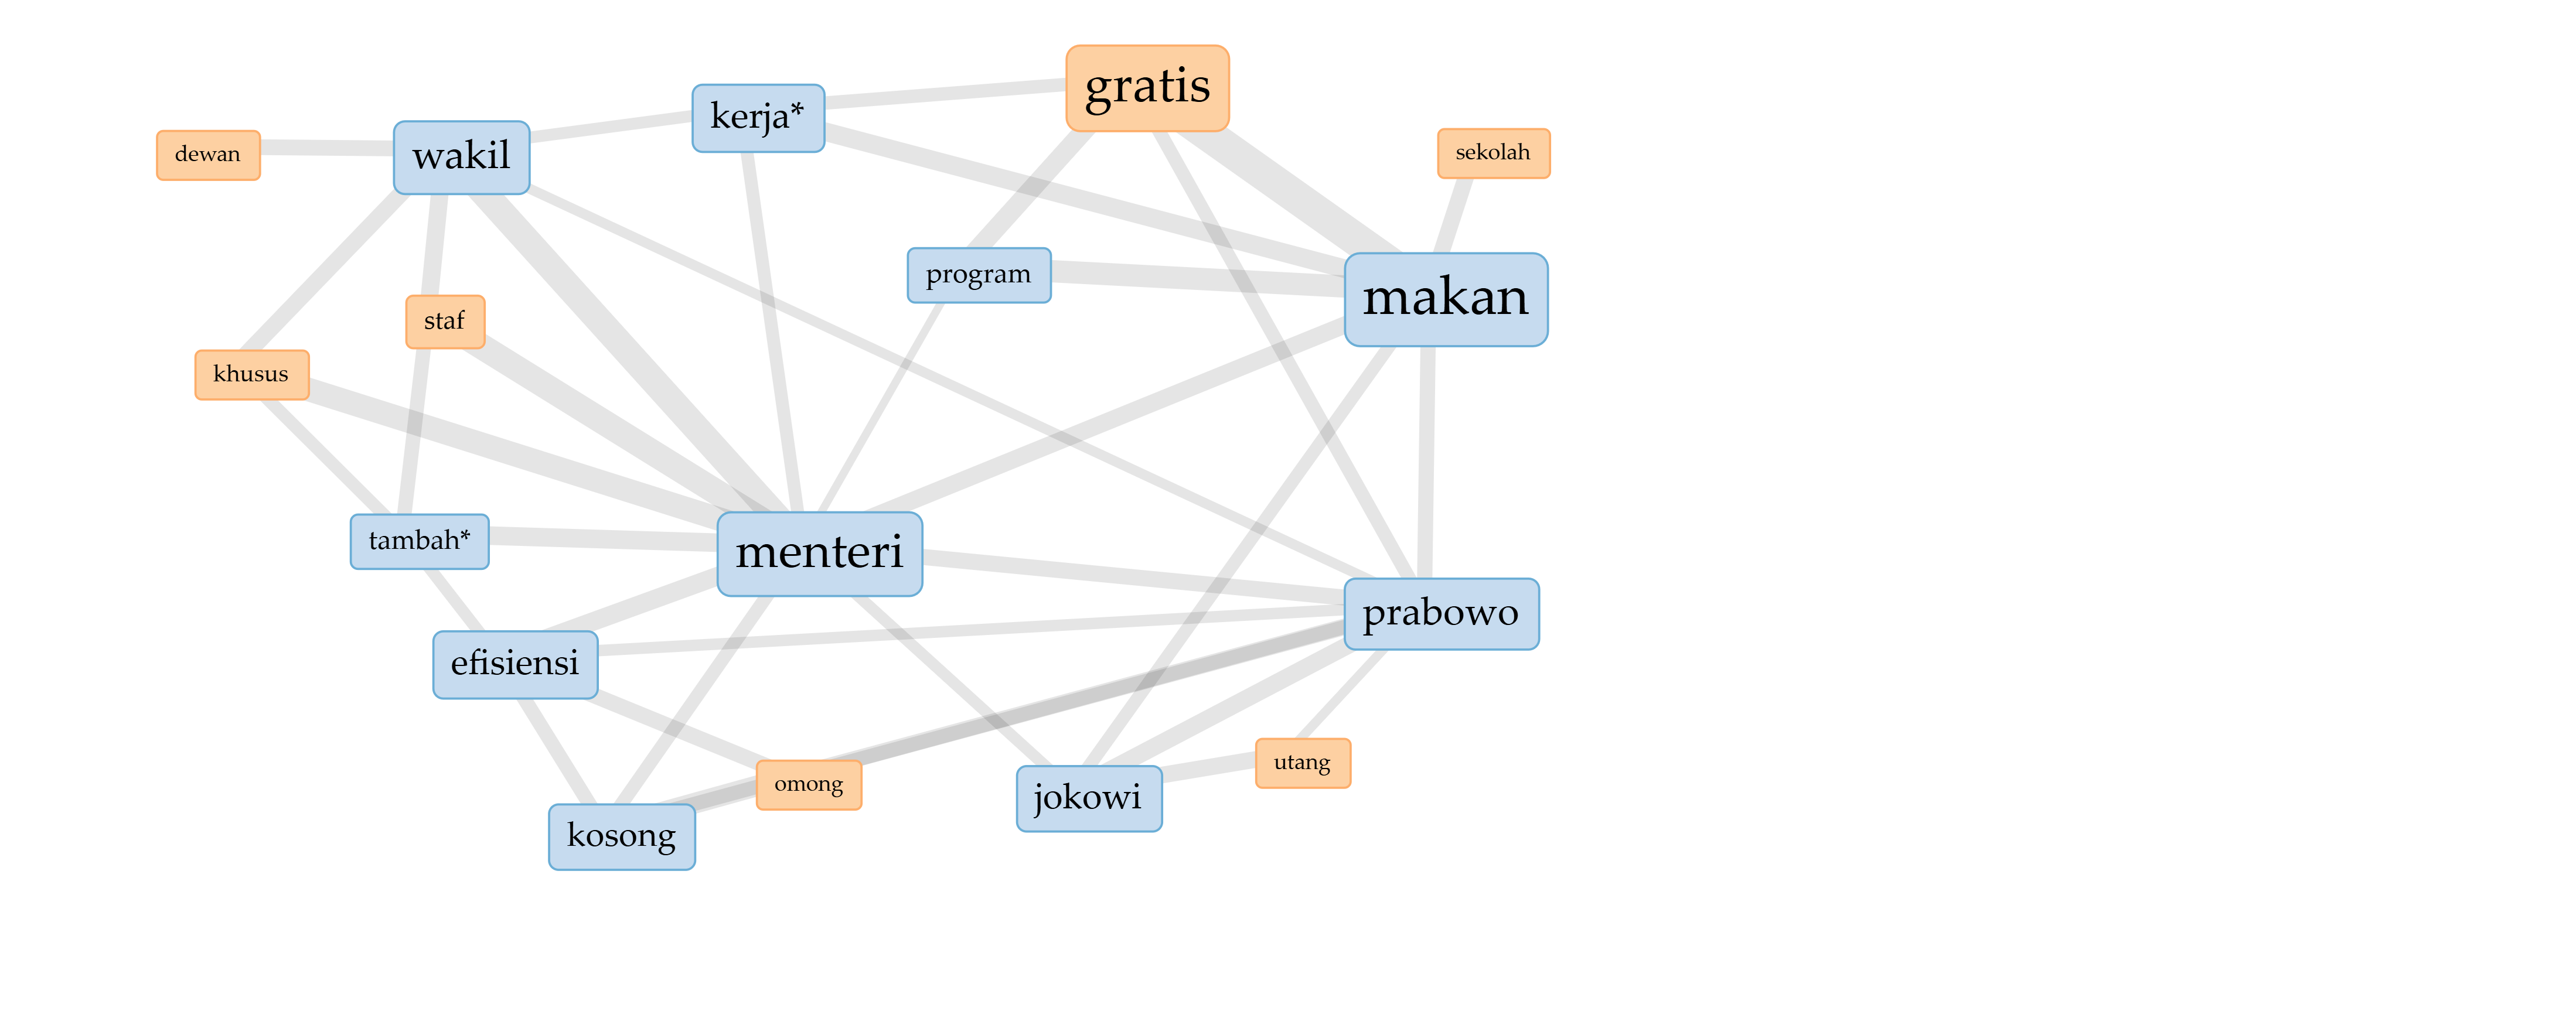

Interpretasi:

Beberapa kata yang paling digunakan adalah ‘kerja’, ‘menteri’, ‘dewan wakil’, ‘makan gratis’, ‘jokowi’, ‘prabowo’,  dan sebagainya. Netizen merasa tidak puas langkah prabowo tentang kebijakan pemotongan anggaran, hal ini ditandai dengan banyaknya kata 'omong kosong' yang muncul. Pendapat yang muncul diantaranya:
- netizen beranggapan bahwa kebijakan pemotongan anggaran berkontradiksi dengan bertambahnya jumlah kementerian dan staf-staf yang ada dalam kementerian. netizen juga berpendapat akan mendukung kebijakan tersebut jika prabowo melakukan pemotongan anggaran terhadap kementerian dan dewan wakil (dpr, dsb)
- pemotongan anggaran difokuskan untuk melaksanakan program pemerintah yang lain, salah satunya adalah makan bergizi gratis (MBG). netizen merasa program ini terlalu dipaksakan dan membuat sektor lain menjadi tidak efisien.
- karena pemotongan anggaran juga dilakukan terhadap beberapa kementerian dan lembaga, netizen khawatir jika kebijakan ini berlangsung akan ada banyak yang tidak bekerja [karena terkena phk].
- adanya asumsi bahwa kebijakan ini adalah dampak dari pemerintahan sebelumnya (jokowi), yakni banyak nya pembangunan infrastrukstur yang menyebabkan anggaran bengkak (hutang), sehingga harus ditanggung oleh pemerintahan saat ini (prabowo) dengan kebijakan pemotongan anggaran.

In [42]:
# melihat isi tweet berdasarkan beberapa kata kunci yang besar
dfnegwhat = filter_teks_multi_kata(dfneg, 'stem_teksnew', ['menteri', 'dewan wakil'])
listneg = list(dfnegwhat['text'])
listurlneg = list(dfnegwhat['video_id'])
list_aur = list(dfnegwhat['author'])
for i in range(5):
  print(f"{i+1}. Link [{'https://www.youtube.com/watch?v=' + listurlneg[i]}], {list_aur[i]}: {listneg[i]}")

1. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @node2infamous13: Yg dipotong tu gaji dpr dan menteri, baru jos
2. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @OrangBijakpart1: Tunjangan DPR dan Tunjangan Menteri dipotong juga biar adil
3. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @-anonymous_888: Sekalian gaji Presiden, Wapres para menteri dan pejabat² negara lainnya termasuk anggota MPR & DPR dipotong gajinya sampai 50%...👍👍👍
4. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @sigemoyfit-club7266: Potong dong tunjangan DPR, Menteri-menteri dan pejabat-pejabat tinggi... Jangan cuman potong yg kecil kecilnya sja... Kasian mereka yg pelaksana di lapangan...
5. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @fianroger: Pangkas gaji DPR, DPD, MPR, Gaji menteri


In [43]:
# melihat isi tweet berdasarkan beberapa kata kunci yang besar
dfnegwhat = filter_teks_multi_kata(dfneg, 'stem_teksnew', ['kerja', 'makan gratis'])
listneg = list(dfnegwhat['text'])
listurlneg = list(dfnegwhat['video_id'])
list_aur = list(dfnegwhat['author'])
for i in range(7):
  print(f"{i+1}. Link [{'https://www.youtube.com/watch?v=' + listurlneg[i]}], {list_aur[i]}: {listneg[i]}")

1. Link [https://www.youtube.com/watch?v=GX-aKctcuX4], @YulisSol-i7w: menteri di musuhi ,Asn dimusuhi,kepala daerah semua di musuhi...ujung ujungnya bukan kompak malah tambah hancur hanya karna progam utama prabowo makan gratis....
Gak kira kuat menghadapi segala aspek kalau pondasinya sudah di rapuhkan...
Ini gila kan!!! Biasa yang kerja untuknya di kasih hadiah biar tambah semangat kerjanya ini sebaliknya malah yang ada mau di kurangi....
Saya yakin pasti amburadur....apalagi ini yang di utamakan bukan kebutuhan utama seluruh rakyat indonesia ..prabowo hanya pintar bahasa inggris tapi kurang pintar matematika 😢😢😢
2. Link [https://www.youtube.com/watch?v=41RGl7dq8YQ], @aliaminrumauw2574: Kalau cek kesehata grati itu sudah bagus karna bantuanya umum, tapi uang kuliah sama makan garatis ini  memihak , lalu orang2 yg gak sekola gimana dapat apa .pemerentah harus adil, ingat 2029 orang2 yg gak sekolah akan cari pemimpin baru yg bisi mengerti orang2 yg gak sekolah kerja burukasa,.....
3. L

In [44]:
# melihat isi tweet berdasarkan beberapa kata kunci yang besar
dfnegwhat = filter_teks_multi_kata(dfneg, 'stem_teksnew', ['jokowi', 'prabowo', 'hutang'])
listneg = list(dfnegwhat['text'])
listurlneg = list(dfnegwhat['video_id'])
list_aur = list(dfnegwhat['author'])
for i in range(7):
  print(f"{i+1}. Link [{'https://www.youtube.com/watch?v=' + listurlneg[i]}], {list_aur[i]}: {listneg[i]}")

1. Link [https://www.youtube.com/watch?v=dPkXZ3Daxh0], @lussytrisna3346: Gara2 Tukang Kayu Jadi Presiden 10 TH .HANCUR KE UANG IND.UTANG SETINGGI GUNUNG .KE SIANG PRABOWO DAPAT IMPAS NYA Ber Sama2 Rakyat .SEKARANG PALING KELUARGA jokowi LAGI NYEGAR NYEGIR MENING MATIN UANG KOSUPSI .TANGGUN JAWAB LU jokowi 😁
2. Link [https://www.youtube.com/watch?v=dPkXZ3Daxh0], @wayanwiriyana7780: Dijaman jokowi inpratruktur maju & banyak proyek setrategis nasional , terutama IKN kata jokowi seblum mbngun ikn inpestor asing ngantri trnyata satupun gak ada .
Bnyak mbangun proyek2 psn tp terjadi pmbengkakn utang luar negeri begitu besar .
Presiden prabowo yng kerepotan .
Jika prabowo bisa mperkecil utang luar negeri & mbngun psn dimana mana berarti prabowo lebih hebat dr jokowi .
3. Link [https://www.youtube.com/watch?v=dPkXZ3Daxh0], @Anisa-zr8kc: Negara bangkrut gara2 utang nya jokowi ygbesar2an..,sesuai omongn wowo indonesia bubar di thn 2030 ..
4. Link [https://www.youtube.com/watch?v=dPkXZ3Daxh0], @Z

#### WC Sentimen Gabungan

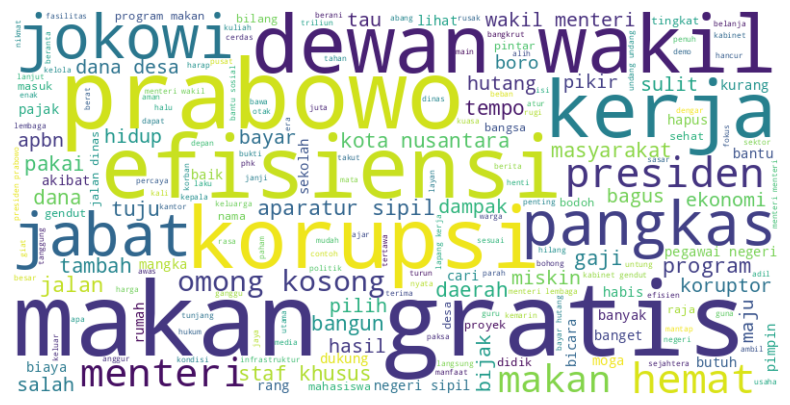

In [45]:
# Gabungkan kolom teks jika ada
text = " ".join(df2['stem_teksnew'])

# Generate dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

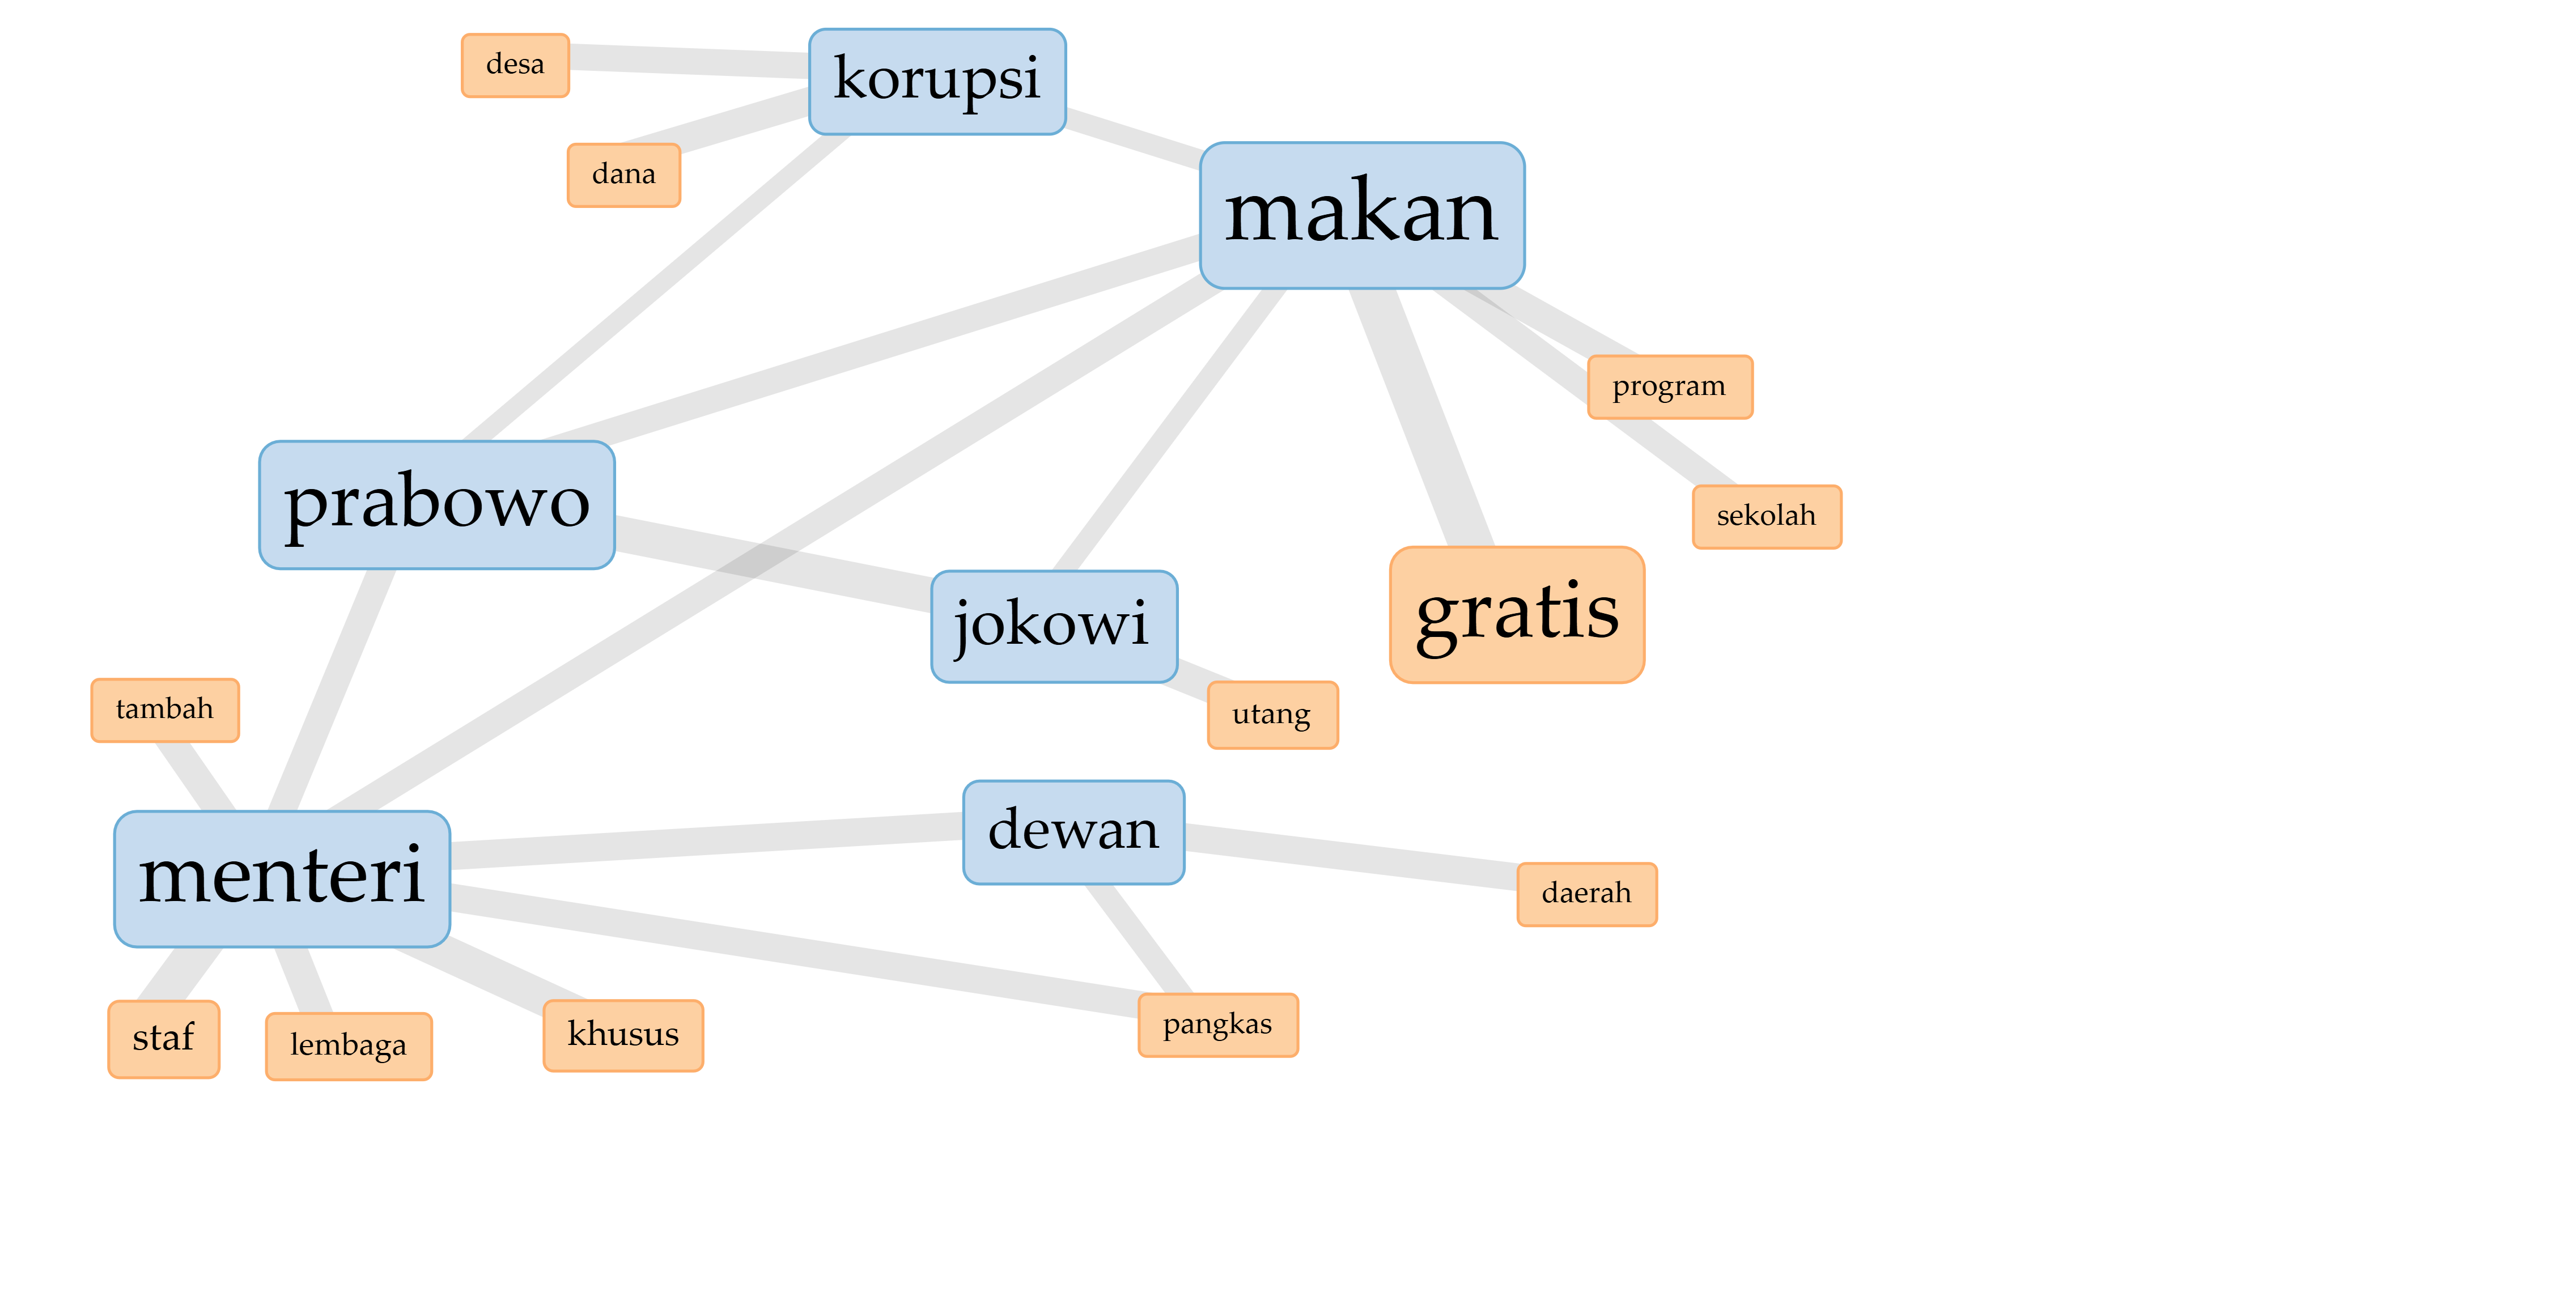

Wordcloud ini menunjukkan bahwa perbincangan publik soal kebijakan pemotongan anggaran sangat kuat mengaitkan peran negara dan dampaknya terhadap rakyat. Banyak komentar mengandung nada kritis terhadap pengelolaan anggaran dan asumsi-asumsi pada kebijakan, terutama karena kata-kata seperti korupsi, menteri, program makan (mbg), dan jabatan cukup menonjol. Hal ini memperkuat temuan dari grafik sebelumnya bahwa sentimen negatif mendominasi respons publik

### Persentase Sentimen tiap Video

In [46]:
df_gabung = df_top_sen[['video_id','label sentiment','text','likes']].merge(df_video_sen, how='left', left_on='video_id', right_on='video_id')
df_gabung['info_video'] = df_gabung['uploader'] + ' | ' + df_gabung['title']
df_gabung.head()

,video_id,label sentiment,text,likes,title,description,uploader,upload_date,view_count,like_count,comment_count,info_video
0,GX-aKctcuX4,negatif,Prediksi saya....semua serba d efisiensi..yg k...,0,Pemerintah Resmi Potong Dana Transfer ke Daera...,Menteri Keuangan Sri Mulyani Indrawati resmi m...,CNBC Indonesia,2025-02-04T14:00:16Z,76649,601,736,CNBC Indonesia | Pemerintah Resmi Potong Dana ...
1,GX-aKctcuX4,negatif,Pemangkasan anggaran daerah akan berpotensi pe...,0,Pemerintah Resmi Potong Dana Transfer ke Daera...,Menteri Keuangan Sri Mulyani Indrawati resmi m...,CNBC Indonesia,2025-02-04T14:00:16Z,76649,601,736,CNBC Indonesia | Pemerintah Resmi Potong Dana ...
2,GX-aKctcuX4,netral,Mantap 😂😂😂😂😂,0,Pemerintah Resmi Potong Dana Transfer ke Daera...,Menteri Keuangan Sri Mulyani Indrawati resmi m...,CNBC Indonesia,2025-02-04T14:00:16Z,76649,601,736,CNBC Indonesia | Pemerintah Resmi Potong Dana ...
3,GX-aKctcuX4,negatif,Yang untuk kepentingan umum malah dipangkas ya...,0,Pemerintah Resmi Potong Dana Transfer ke Daera...,Menteri Keuangan Sri Mulyani Indrawati resmi m...,CNBC Indonesia,2025-02-04T14:00:16Z,76649,601,736,CNBC Indonesia | Pemerintah Resmi Potong Dana ...
4,GX-aKctcuX4,negatif,Tunjangan pejabat yg harus dipangkas,0,Pemerintah Resmi Potong Dana Transfer ke Daera...,Menteri Keuangan Sri Mulyani Indrawati resmi m...,CNBC Indonesia,2025-02-04T14:00:16Z,76649,601,736,CNBC Indonesia | Pemerintah Resmi Potong Dana ...


<ipython-input-47-4f5dd0020dd3>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


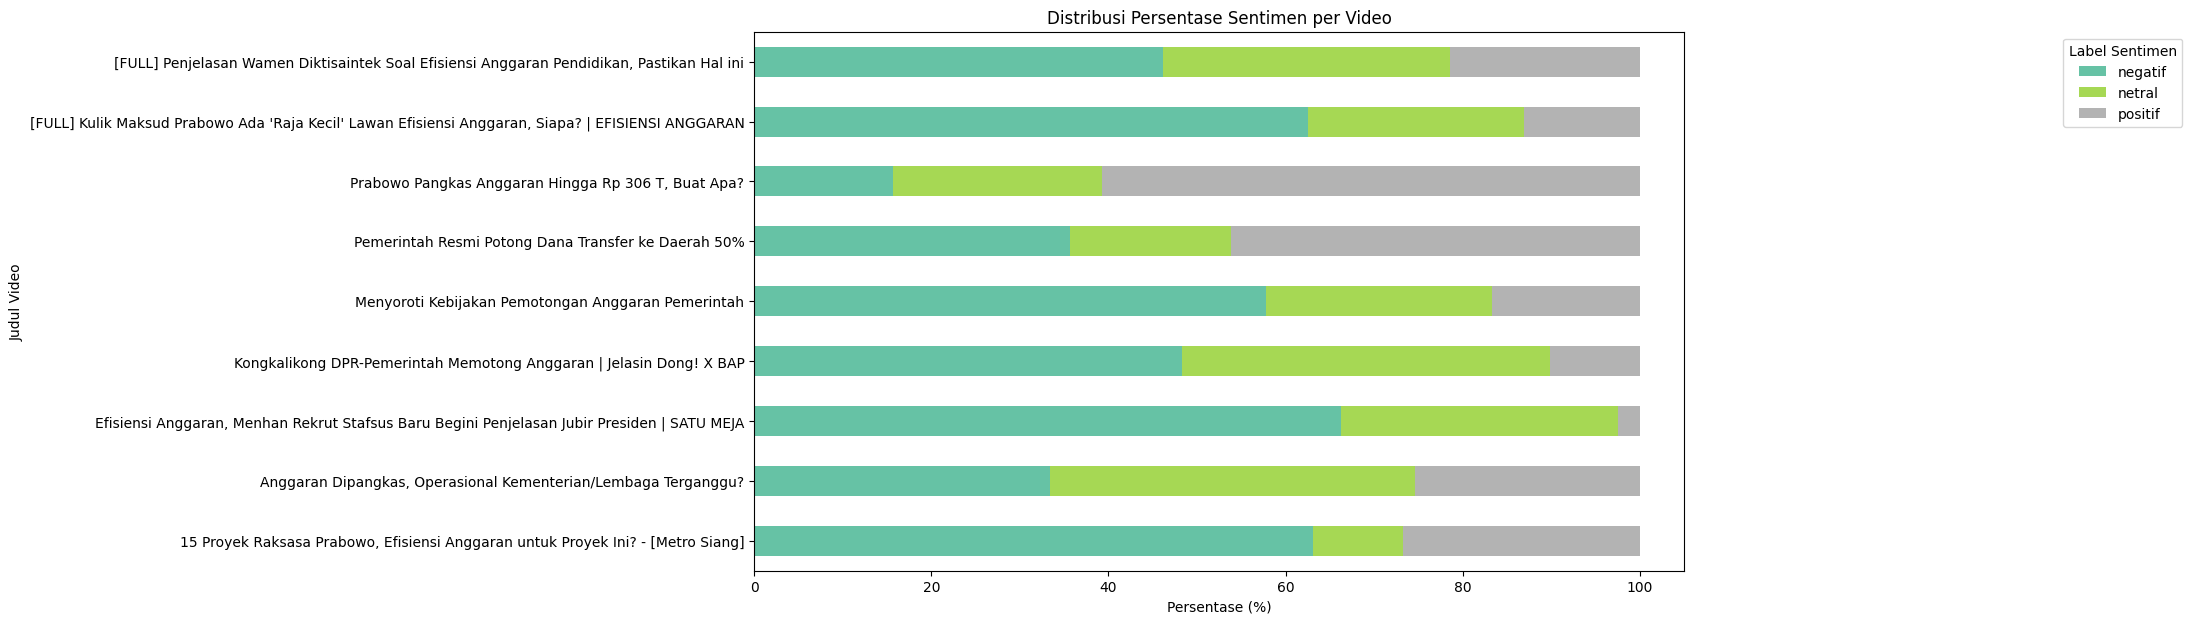

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah sentimen per channel
sentiment_counts = df_gabung.groupby(['title', 'label sentiment']).size().unstack(fill_value=0)

# Hitung persentase per channel
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Buat stacked barplot dengan persentase
sentiment_percentages.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 7),
    colormap='Set2'
)

plt.title('Distribusi Persentase Sentimen per Video')
plt.ylabel('Judul Video')
plt.xlabel('Persentase (%)')
# plt.xticks(rotation=45, ha='right')
plt.legend(title='Label Sentimen', bbox_to_anchor=(1.4, 1), loc='upper left')
plt.tight_layout()
plt.show()



Sebagian besar video didominasi oleh sentimen negatif, terutama pada isu-isu yang bersifat spesifik seperti “Menhan rekrut stafsus baru” yang hanya memiliki sedikit komentar positif. Hal ini menunjukkan bahwa penolakan masyarakat terhadap kebijakan efisiensi anggaran tidak semata-mata disebabkan oleh substansi kebijakan tersebut, melainkan juga karena ketidaksesuaian antara narasi penghematan dan praktik di lapangan.

Di satu sisi, pemerintah melakukan pemangkasan anggaran di sektor-sektor publik penting seperti pendidikan, kesehatan, dan infrastruktur. Namun di sisi lain, muncul kebijakan yang justru menambah struktur seperti staf khusus, yang tentu memerlukan alokasi anggaran tambahan. Kontradiksi ini menimbulkan persepsi negatif di tengah masyarakat, seolah-olah efisiensi hanya berlaku untuk kepentingan publik, bukan pada struktur birokrasi pemerintahan itu sendiri.

Jika efisiensi anggaran memang menjadi prioritas, semestinya langkah awal dilakukan dengan merampingkan struktur pemerintahan atau setidaknya tidak merevisi Undang-Undang Kementerian Negara yang justru membuka peluang untuk memperbesar jumlah kementerian. Hal ini dapat berdampak pada peningkatan pos-pos belanja dalam Anggaran Pendapatan dan Belanja Negara (APBN) maupun Daerah (APBD), yang pada akhirnya bertentangan dengan semangat efisiensi itu sendiri.


In [48]:
# video dengan persentase positif terbanyak
videonya = 'Prabowo Pangkas Anggaran Hingga Rp 306 T, Buat Apa?'
video_positif  = df_gabung[df_gabung['title']==videonya].sort_values(by='likes', ascending=False).reset_index(drop=True)
for i in video_positif['text'].head().to_list():
    print(f'komentar: {i}')

komentar: Hebat sekali pak Prabowo waspadai dengan menghemat anggaran termasuk mengatasi para koruptor dan berani bertindak tegas ini disebabkan lambat nya UU penyitaan asset negara hingga Jaksa Agung bertindak memberikan semua aset dapat dimanfaatkan sebagai melaksanakan pembangunan dengan tepat guna sesuai dibutuhkan secara efektif dan penghemat dapat terlaksana dengan baik buat bangsa Indonesia.
komentar: Sukses pak Prabowo dimasa depan reformasi berlanjut terus menerus.
komentar: Janganrisaujanganwatirmarikitadukungkitadoakaninsyaallohbppresprabowoorangnjaselaluoptimisdanjujur❤❤😮
komentar: Lebih setuju pangkas anggaran perjalanan dinas keluar negeri para anggota DPR-RI itu sangat lumayan.besarannya dan.bisa dialokasikan untuk kepentingan yg lebih urgen misalnya utk program makan gratis anak sekolah.😍😍😍
komentar: Betapa perihnya pk perabowo mengkedepankan negeri ini , di akibatkn kepemimpinan pemerintah yg lalu


In [49]:
# video dengan persentase negatif terbanyak
videonya = 'Efisiensi Anggaran, Menhan Rekrut Stafsus Baru Begini Penjelasan Jubir Presiden | SATU MEJA'
video_negatif  = df_gabung[df_gabung['title']==videonya].sort_values(by='likes', ascending=False).reset_index(drop=True)
for i in video_negatif['text'].head().to_list():
    print(f'komentar: {i}')

komentar: Balas jasa terhadap dedi yang sudah gertak anak kecil yang memprotes kualitas makanan bergizi gratis😂😂
komentar: Pemerintah yang baik itu adalah miskin struktur kaya fungsi bukan Kaya Struktur Miskin Fungsi.
Pemerintahan sekarang bukan birokrasi modern tapi birokrasi ala jaman Purba
komentar: Politik balas budi,ujung,, y rakyat yg d bebani
komentar: Menteri uda gemuk di tambah para staf staf khusus gaji gede  rakyat menjerit😂😂😂😂😂😂
komentar: Stafsus itu kan lemak....bukankah di sana ada CPNS dan ASN yg jg sdh ada


# Kesimpulan

Inpres No. 1 Tahun 2025 menuai beragam respon dari masyarakat. Dukungan muncul karena kebijakan ini dinilai mampu mengurangi pemborosan anggaran dan potensi korupsi. Namun, mayoritas komentar bernilai negatif sebagai bentuk penolakan terhadap kebijakan ini karena kekhawatiran akan berdampak pada pemutusan hubungan kerja (PHK). Beberapa juga menilai efisiensi ini hanya omong kosong belaka yang bertolak belakang dengan apa yang terjadi dilapangan dan dilakukan demi membiayai program MBG yang dianggap belum mendesak.

Masyarakat berharap efisiensi anggaran tidak mengorbankan kesejahteraan dan tetap berpihak pada kebutuhan rakyat.

# Saran

- Pangkas anggaran yang benar-benar bisa dipangkas. Efisiensi sebaiknya diberlakukan untuk anggaran yang tidak mendesak, seperti anggaran konsumsi rapat pejabat, mobil pejabat eselon 1, mengurangi birokrasi yang gemuk dan staf khusus yang kurang diperlukan, serta program-program yang tidak ada urgensinya sepeti MBG.
- Jangan korbankan pendidikan dan kesehatan. Efisiensi anggaran sebaiknya tidak diberlakukan untuk kementrian kesehatan, disdik saintek, dan pendidikan dasar dan menengah karena sektor -sektor ini merupakan sektor yang terlibat dan berdampak langsung pada masyarakat.
- Libatkan masyarakaat. Pemerintah perlu lebih transparan dalam penggunaan anggaran agar masyarakat bisa ikut mengawasi.
- Bersikap adil dan bijak. Efisiensi anggaran perlu dikaji kembali agar tidak hanya menguntungkan pemerintah tetapi juga memiliki dampak positif terhadap masyarakat.

# VIDEO PRESENTASI

[Video_Presentasi_MID_AMS](https://www.youtube.com/watch?v=OKSLCrIVzqo)